In [63]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from datetime import datetime

In [64]:
data = pd.read_csv("train_ML_IOT.csv")

In [65]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

data['Year'] = [date.year for date in data.DateTime]
data['Quarter'] = [date.quarter for date in data.DateTime]
data['Weekday'] = [datetime.weekday(date) for date in data.DateTime]
data["IsWeekend"] = data["Weekday"] >= 5
data['Month'] = [date.month for date in data.DateTime]
data['Week'] = [date.week for date in data.DateTime]
data['Day'] = [date.day for date in data.DateTime]
data['Hour'] = [date.hour for date in data.DateTime]

In [66]:
junction_1 = data[data["Junction"]==1]
junction_2 = data[data["Junction"]==2]
junction_3 = data[data["Junction"]==3]
junction_4 = data[data["Junction"]==4]

junctions = [junction_1, junction_2, junction_3, junction_4]

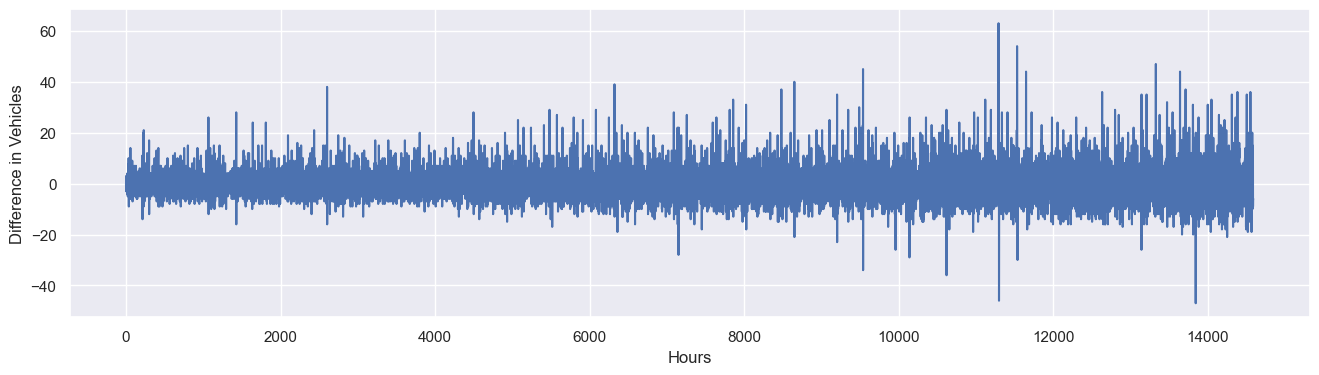

In [67]:
vehicle_diff = np.diff(junction_1.Vehicles)
vehicle_diff = np.insert(vehicle_diff, 0, 0)

plt.plot(np.arange(len(junction_1.Vehicles)), vehicle_diff)
plt.xlabel("Hours")
plt.ylabel("Difference in Vehicles")
plt.show()

To plot the differences between consecutive data points

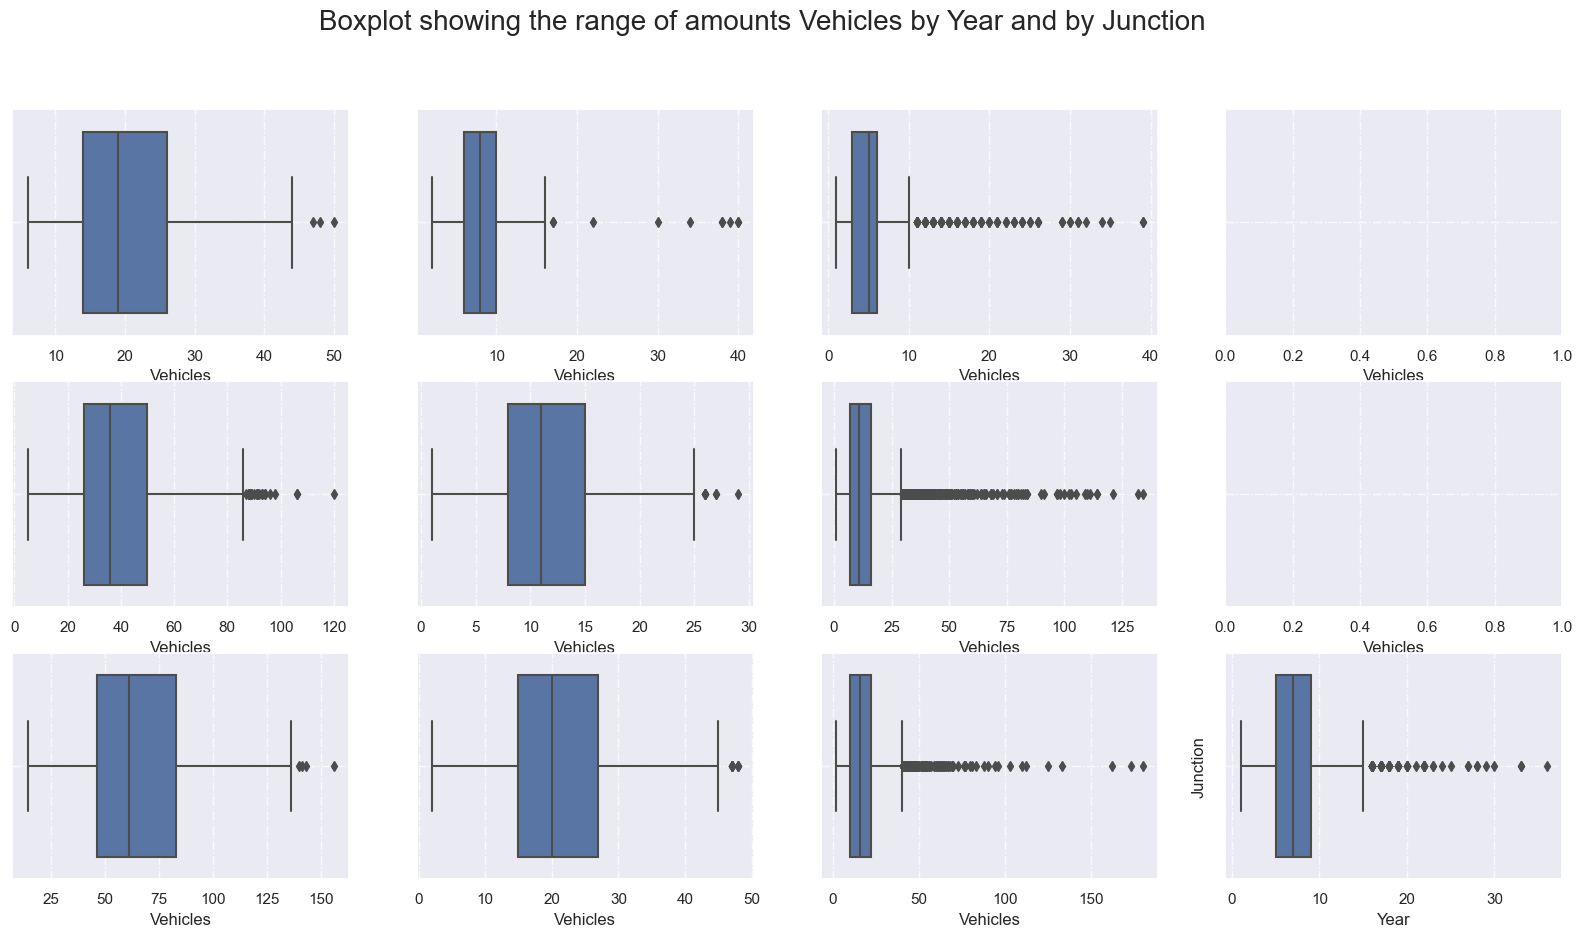

In [68]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in zip(range(3), range(2015, 2018)):
  for j, junction in zip(range(4), range(1, 5)):
    sns.boxplot(x=data[(data.Junction == junction) & (data.Year == year)]['Vehicles'], ax=axis[i, j])
    axis[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Boxplot showing the range of amounts Vehicles by Year and by Junction', fontsize=20)
plt.show()

In boxplot, we can see a lot of outliers (those which is the dot)

### One Hot Encoding

One-Hot Encoding is a data conversion technique used to convert categorical data (category or class labels) into numerical data.

Defines a function that converts date and time values in a data frame to a Unix timestamp.

In [69]:
def date_to_unix(df):
    unix_time = []  # Initialising unixtime list
    
    # Running a loop for converting Date to seconds
    for date in df['DateTime']:
        unix_time.append(time.mktime(date.timetuple()))
    
    # Replacing Date with unixtime list
    df['DateTime'] = unix_time
    return(df)

In [70]:
data_features = date_to_unix(data.drop(['Vehicles', 'Year', 'Quarter', 'Month'], axis=1))
X = data_features

In [71]:
X.Junction = X.Junction.astype("str")
X.Weekday = X.Weekday.astype("str")
X.Day = X.Day.astype("str")

In [72]:
X = pd.get_dummies(X)
y = data.Vehicles.to_frame()
X

DateTime           ID  IsWeekend  Week  Hour  Junction_1  \
0      1.446325e+09  20151101001       True    44     0        True   
1      1.446329e+09  20151101011       True    44     1        True   
2      1.446332e+09  20151101021       True    44     2        True   
3      1.446336e+09  20151101031       True    44     3        True   
4      1.446340e+09  20151101041       True    44     4        True   
...             ...          ...        ...   ...   ...         ...   
48115  1.498838e+09  20170630194      False    26    19       False   
48116  1.498842e+09  20170630204      False    26    20       False   
48117  1.498846e+09  20170630214      False    26    21       False   
48118  1.498849e+09  20170630224      False    26    22       False   
48119  1.498853e+09  20170630234      False    26    23       False   

       Junction_2  Junction_3  Junction_4  Weekday_0  ...  Day_29  Day_3  \
0           False       False       False      False  ...   False  False   
1           False       False       False      False  ...   False  False   
2           False       False       False      False  ...   False  False   
3           False       False       False      False  ...   False  False   
4           False       False       False      False  ...   False  False   
...           ...         ...         ...        ...  ...     ...    ...   
48115       False       False        True      False  ...   False  False   
48116       False       False        True      False  ...   False  False   
48117       False       False        True      False  ...   False  False   
48118       False       False        True      False  ...   False  False   
48119       False       False        True      False  ...   False  False   

       Day_30  Day_31  Day_4  Day_5  Day_6  Day_7  Day_8  Day_9  
0       False   False  False  False  False  False  False  False  
1       False   False  False  False  False  False  False  False  
2       False   False  False  False  False  False  False  False  
3       False   False  False  False  False  False  False  False  
4       False   False  False  False  False  False  False  False  
...       ...     ...    ...    ...    ...    ...    ...    ...  
48115    True   False  False  False  False  False  False  False  
48116    True   False  False  False  False  False  False  False  
48117    True   False  False  False  False  False  False  False  
48118    True   False  False  False  False  False  False  False  
48119    True   False  False  False  False  False  False  False  

[48120 rows x 47 columns]

In [73]:
y

Vehicles
0            15
1            13
2            10
3             7
4             9
...         ...
48115        11
48116        30
48117        16
48118        22
48119        12

[48120 rows x 1 columns]

## Outlier Detection

In [74]:
!pip install adtk
from adtk.visualization import plot
from adtk.data import validate_series
from adtk.detector import SeasonalAD
from adtk.detector import InterQuartileRangeAD
from adtk.detector import GeneralizedESDTestAD
from adtk.detector import PersistAD
from adtk.detector import VolatilityShiftAD

In [75]:
jads = [junction_1, junction_2, junction_3, junction_4]
for i,j in enumerate(junctions):
    jads[i] = j.Vehicles
    jads[i].index = j.DateTime

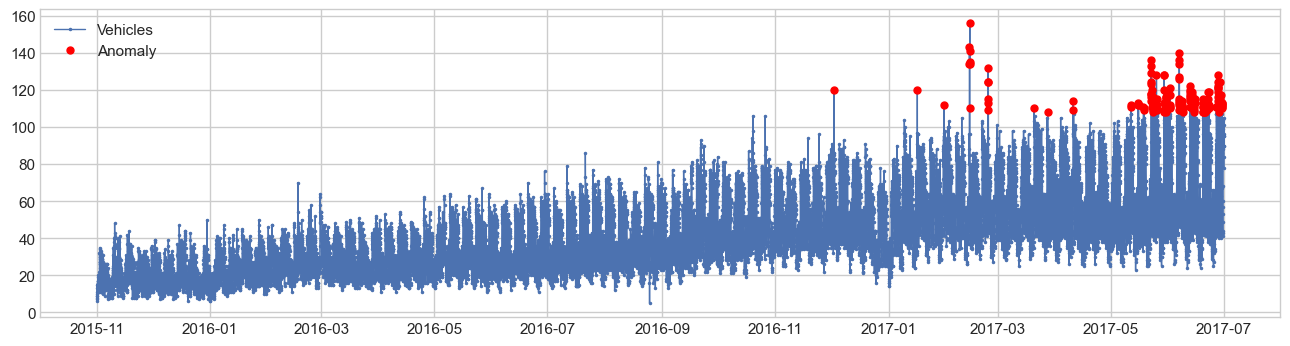

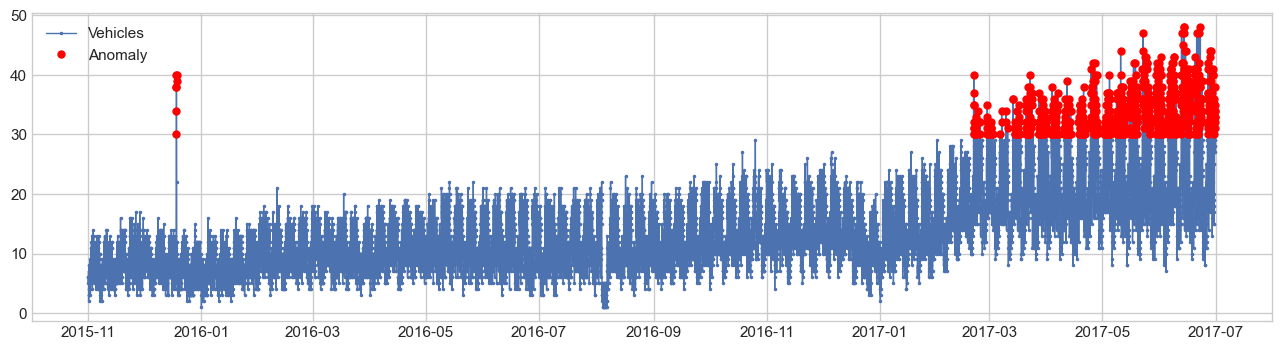

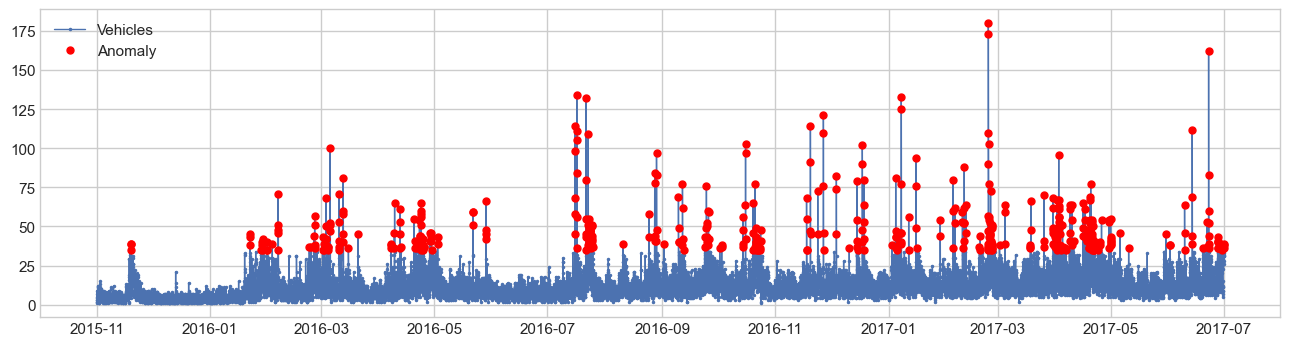

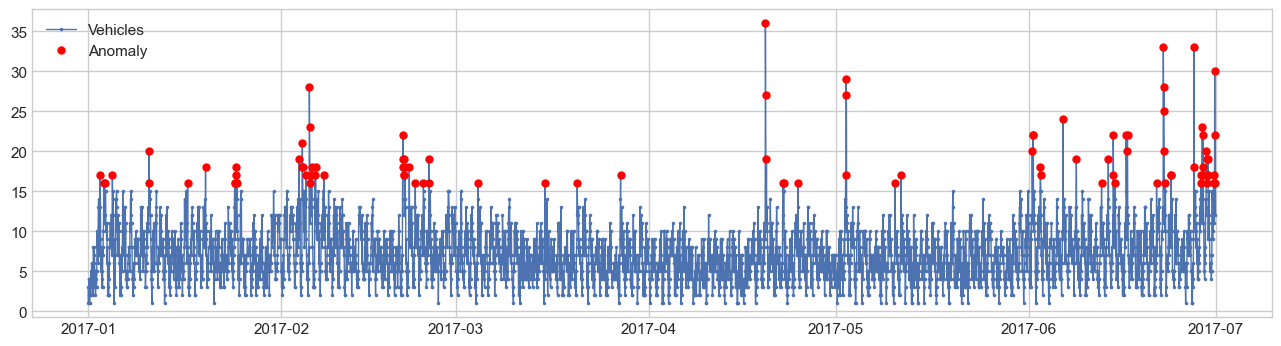

In [76]:
iqr_ad = InterQuartileRangeAD(c=1.5)
for jad in jads:
    anomalies = iqr_ad.fit_detect(jad)
    plot(jad, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")

This represents an Outlier Detector used to detect outliers using the Interquartile Range (IQR) method. The "c" parameter represents a constant multiplier used for outlier detection. This multiplier controls how many times the distance from the IQR is considered as outliers.

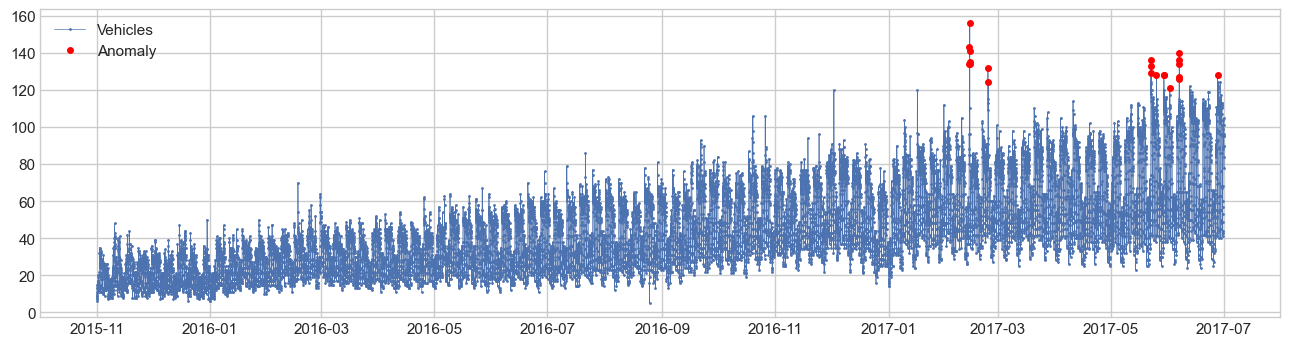

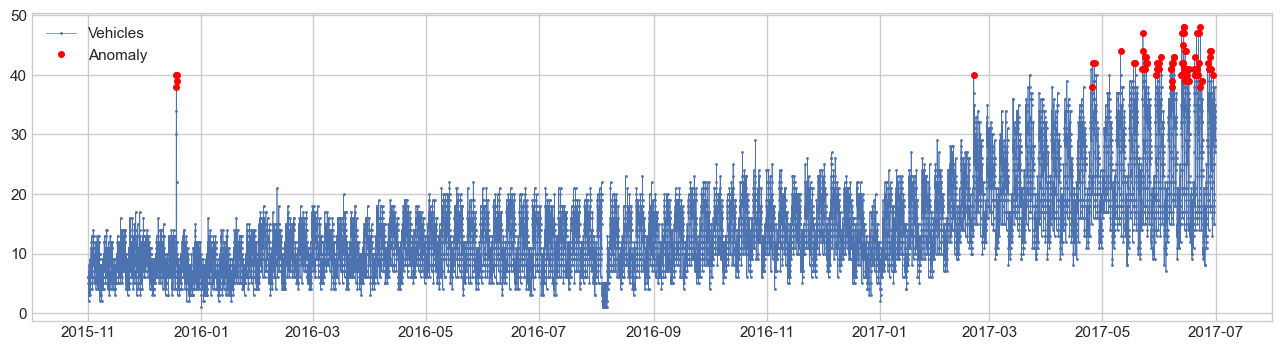

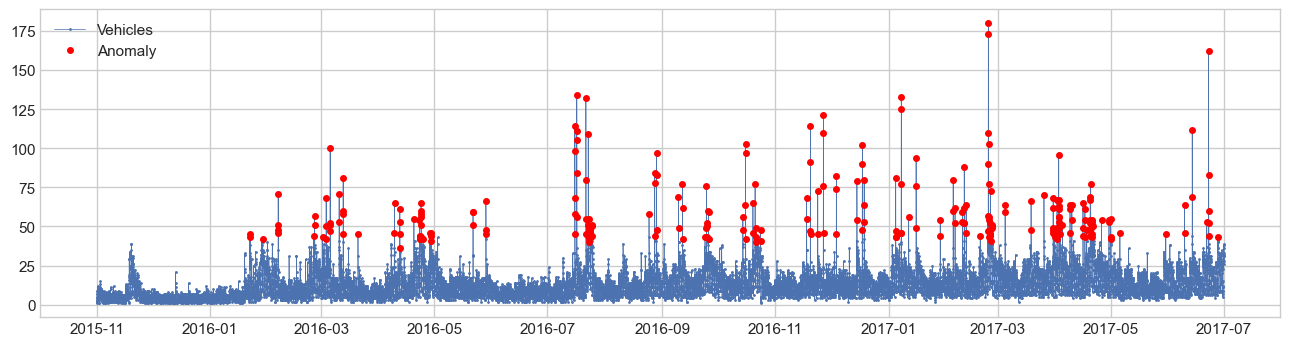

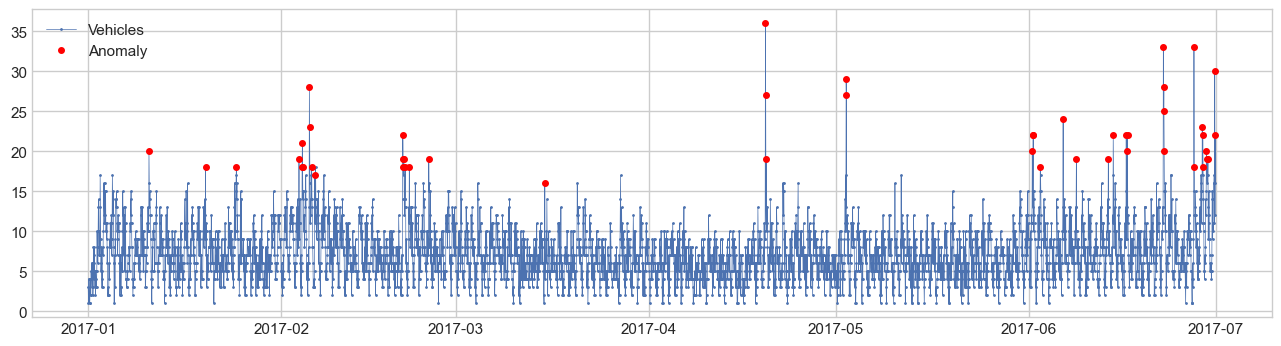

In [77]:
seasonal_vol = SeasonalAD()
for jad in jads:
    jad = validate_series(jad)
    anomalies = seasonal_vol.fit_detect(jad)
    anomalies.value_counts()
    plot(jad, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
    plt.show()

This represents the outlier detector that will be used for seasonal outlier detection.

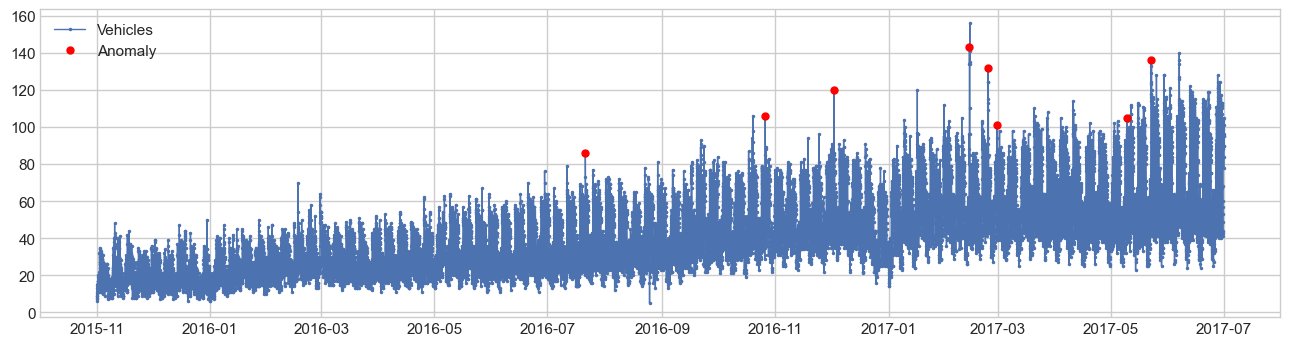

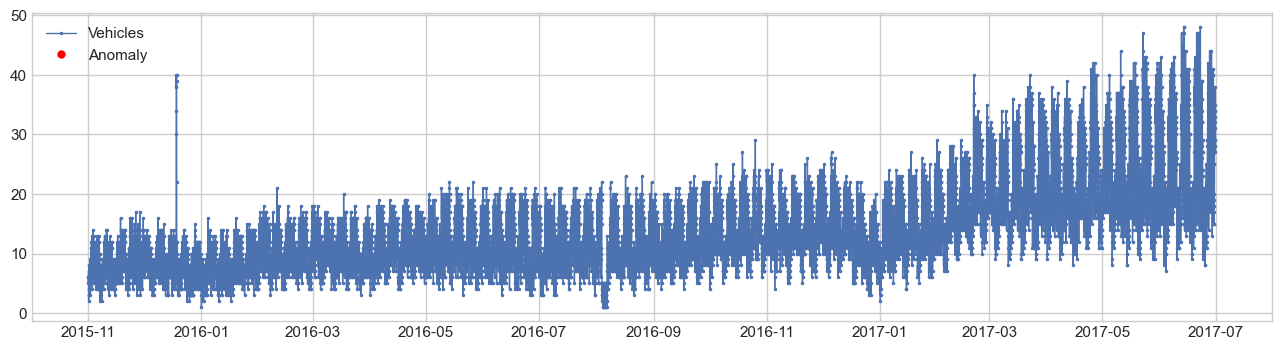

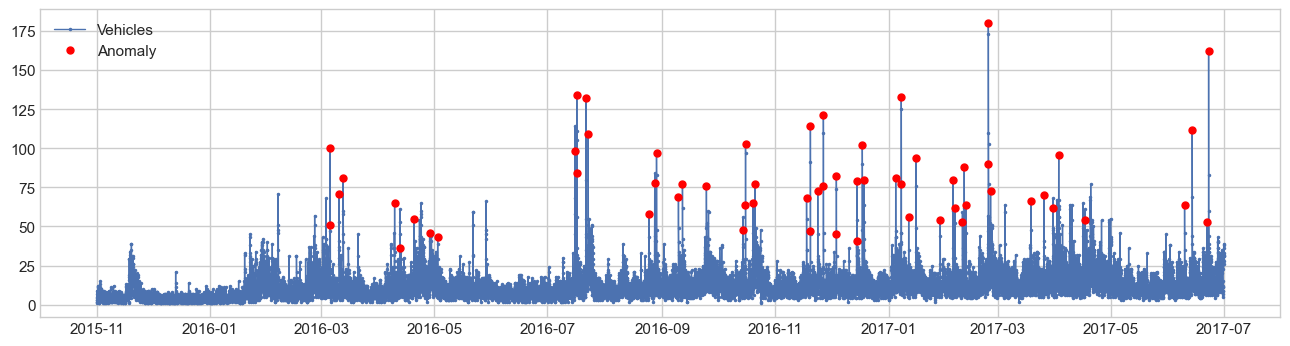

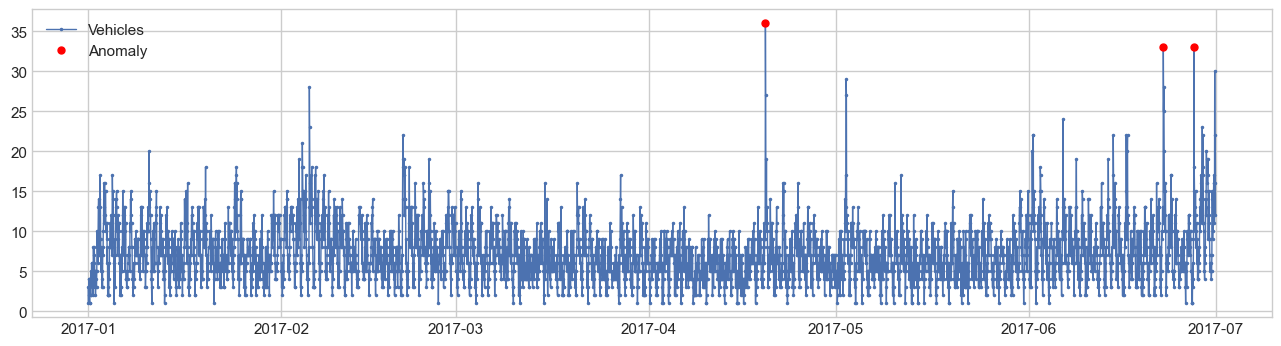

In [78]:
persist_ad = PersistAD(c=8, side='positive')
for jad in jads:
    anomalies = persist_ad.fit_detect(jad)
    plot(jad, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")

The Persistent Outlier Detection (PersistAD) is used to detect unexpected changes in a time series. These changes are defined as significant deviations that either exceed or fall below a specific threshold value (c) in the time series.

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_seasonal_decomposition(dataframe, junction_name):
    
    decomposition = seasonal_decompose(dataframe['Vehicles'], model='additive', period=24)  # Assuming a daily seasonality
    
    # Create subplots for trend, seasonal, and residual components
    fig, axes = plt.subplots(4, 1, figsize=(12, 8))
    
    # Original time series
    axes[0].set_title(f'{junction_name} - Original Time Series')
    axes[0].plot(dataframe.index, dataframe['Vehicles'], label='Original', color='blue')
    
    # Trend component
    axes[1].set_title('Trend Component')
    axes[1].plot(decomposition.trend.index, decomposition.trend, label='Trend', color='green')
    
    # Seasonal component
    axes[2].set_title('Seasonal Component')
    axes[2].plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal', color='red')
    
    # Residual component
    axes[3].set_title('Residual Component')
    axes[3].plot(decomposition.resid.index, decomposition.resid, label='Residual', color='purple')
    
    plt.tight_layout()
    
    for ax in axes:
        ax.legend()
    
    plt.show()

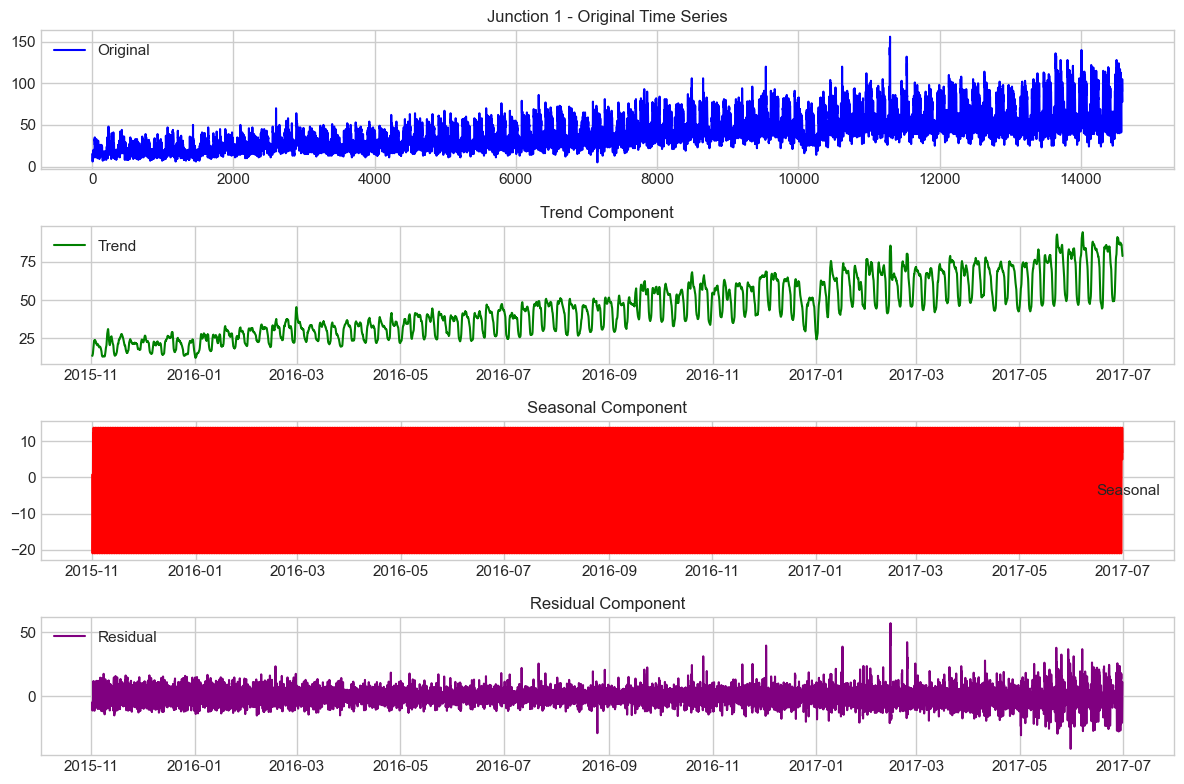

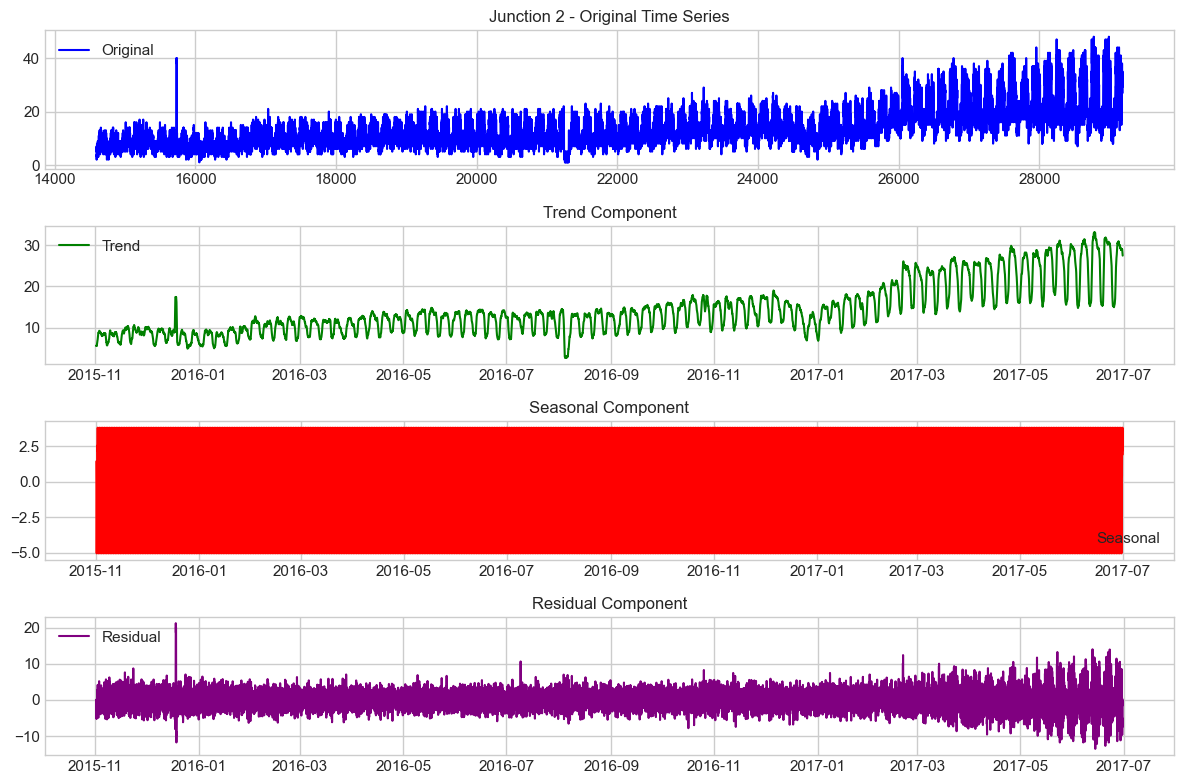

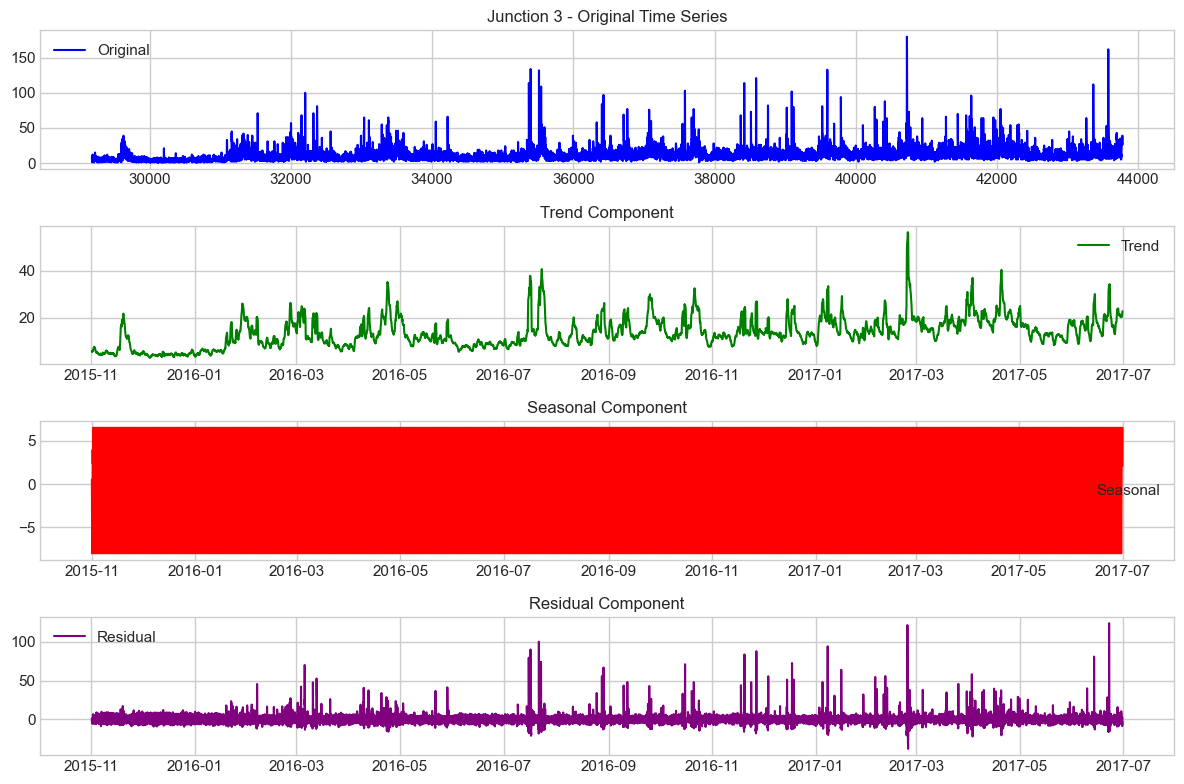

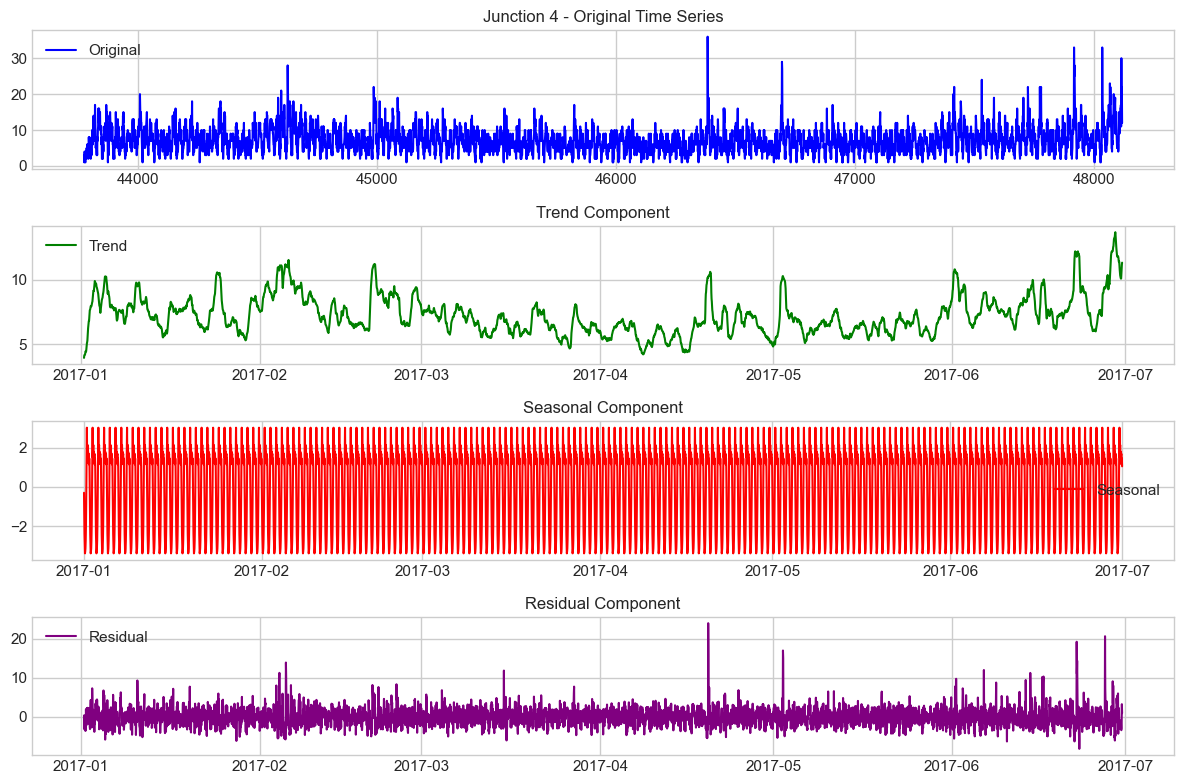

In [80]:
plot_seasonal_decomposition(junction_1, 'Junction 1')
plot_seasonal_decomposition(junction_2, 'Junction 2')
plot_seasonal_decomposition(junction_3, 'Junction 3')
plot_seasonal_decomposition(junction_4, 'Junction 4')

In [81]:
def plot_seasonal_component(dataframe, junction_name):
   
    decomposition = seasonal_decompose(dataframe['Vehicles'], model='additive', period=24*7)  # Assuming a daily seasonality
    
    seasonal_component_from_april_2017 = decomposition.seasonal['2017-04-01':]
    
    plt.figure(figsize=(12, 4))
    plt.plot(seasonal_component_from_april_2017, label='Seasonal Component', color='red')
    plt.title(f'Seasonal Component for {junction_name} starting from April 2017')
    plt.xlabel('Date')
    plt.ylabel('Seasonal Component')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()

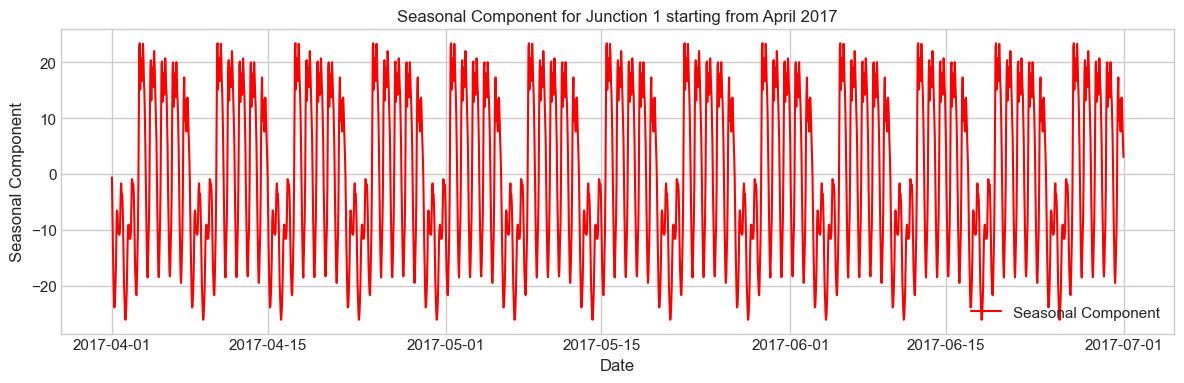

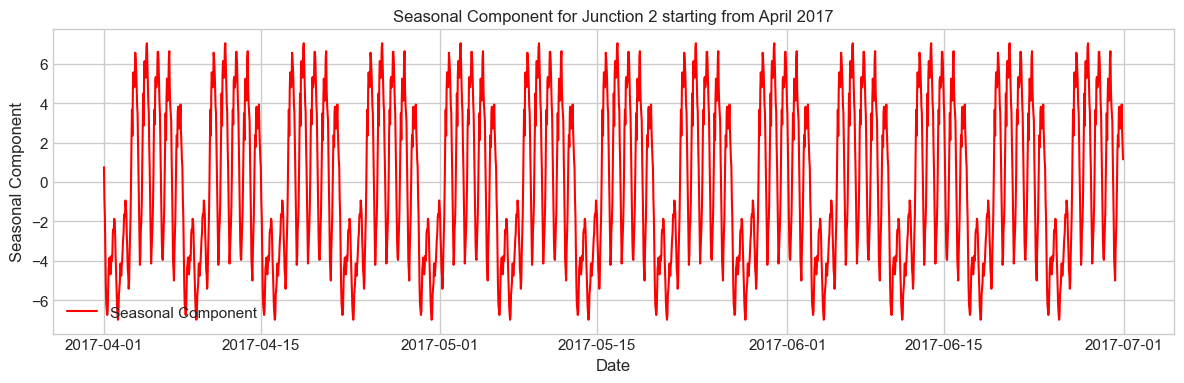

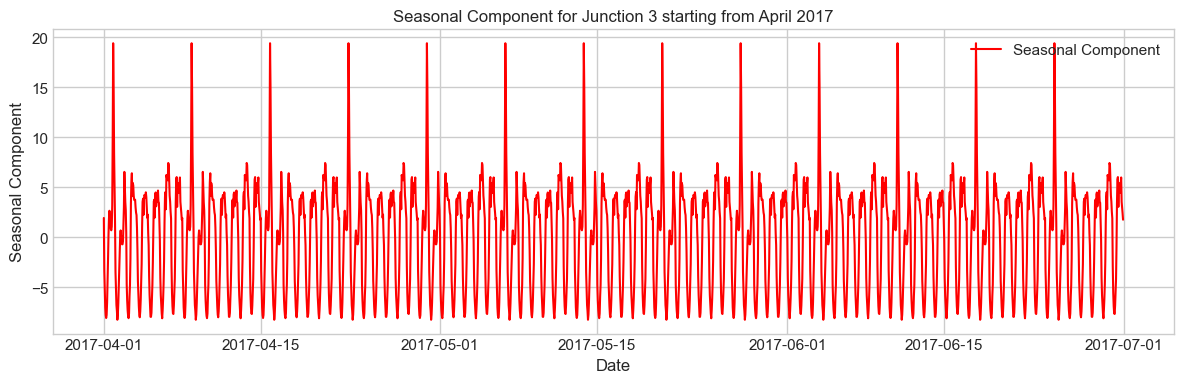

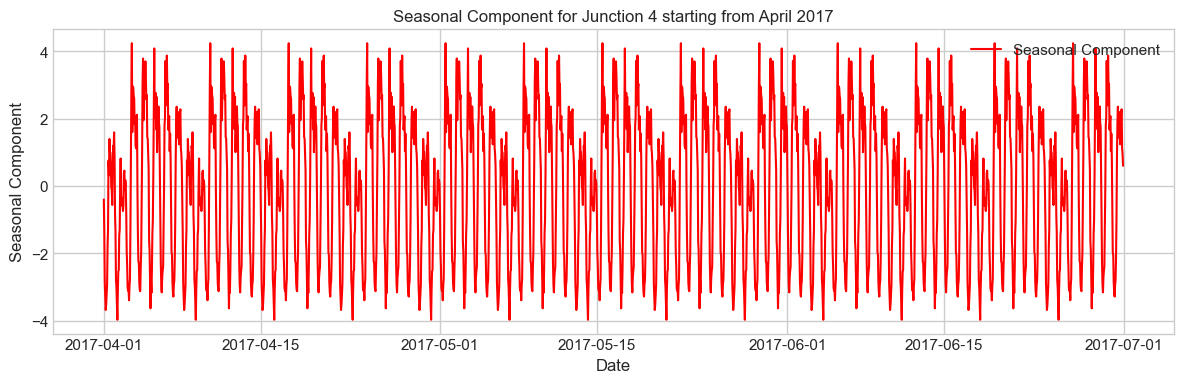

In [82]:
plot_seasonal_component(junction_1, 'Junction 1')
plot_seasonal_component(junction_2, 'Junction 2')
plot_seasonal_component(junction_3, 'Junction 3')
plot_seasonal_component(junction_4, 'Junction 4')

In [83]:
sns.set(rc={'figure.figsize':(16, 4)})

In [84]:
def plot_outlier_detection(j, idx, rmeans, upper, lower, std_param = 3, alpha = 0.015):
    plt.plot(j)
    plt.plot(rmeans, color = 'red')
    plt.plot(upper, color = 'blue')
    plt.plot(lower, color = 'blue')
    plt.xlabel("Date")
    plt.ylabel("Vehicles")
    plt.scatter(j.index[idx],j[idx], color = 'yellow',zorder=10)
    plt.show()

plt.plot(rmeans, color='red'): This line is used to plot the moving average of the time series (rmeans) in red color. It visually represents the moving average.

plt.plot(upper, color='orange') and plt.plot(lower, color='orange'): These two lines plot the upper and lower bounds in orange color. These bounds represent the threshold values for outliers. upper represents the upper bounds, and lower represents the lower bounds.

plt.xlabel("Date") and plt.ylabel("Vehicles"): These lines set the axis labels for the graph. The X-axis is labeled as "Date," and the Y-axis is labeled as "Vehicles."

plt.scatter(j.index[idx], j[idx], color='purple', zorder=10): This line marks the detected outliers in purple color. The idx array marks the time points where outliers are found. The zorder parameter ensures that the outliers appear in front of other drawings.

In [85]:
def model_mean(j, std_param = 3, window_length = 720):
    
    rmeans = j.rolling(window_length, min_periods=1).mean()
    rstd = j.rolling(window_length, min_periods=1).std()
    
    idx1 = (j>(rmeans+std_param*rstd))
    idx2 = (j<(rmeans-std_param*rstd))
    idx = idx1 | idx2
    
    upper = rmeans+std_param*rstd
    lower = rmeans-std_param*rstd
    
    return j, idx, rmeans, upper, lower

Based on the moving average and standard deviation of the time series, it detects outliers by comparing them with the specified threshold value (std_param). The idx array marks the time points where outliers are found. This way, it can be used to identify unexpected changes or deviations in the time series.

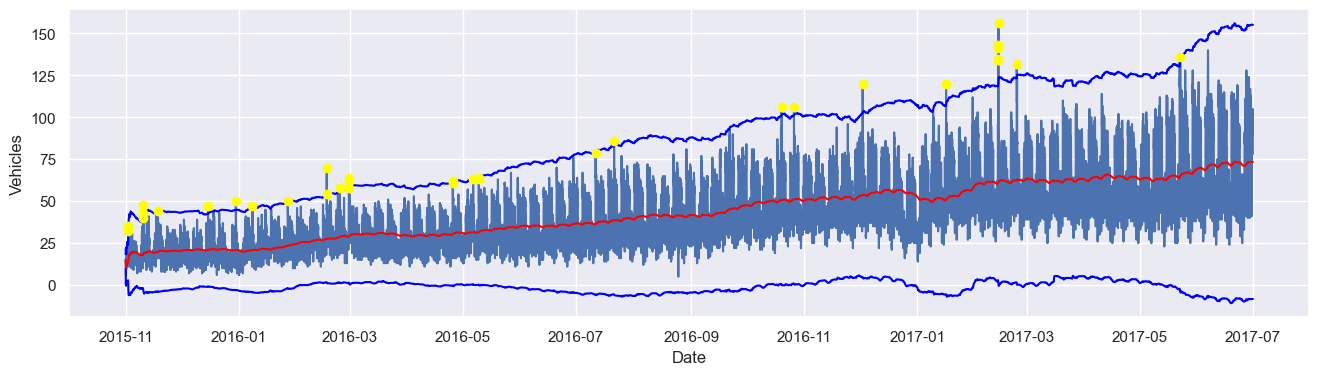

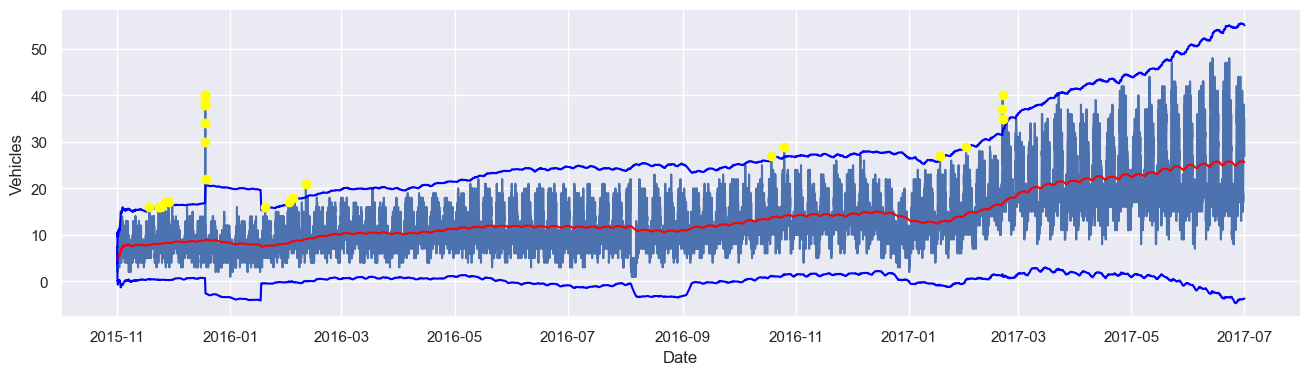

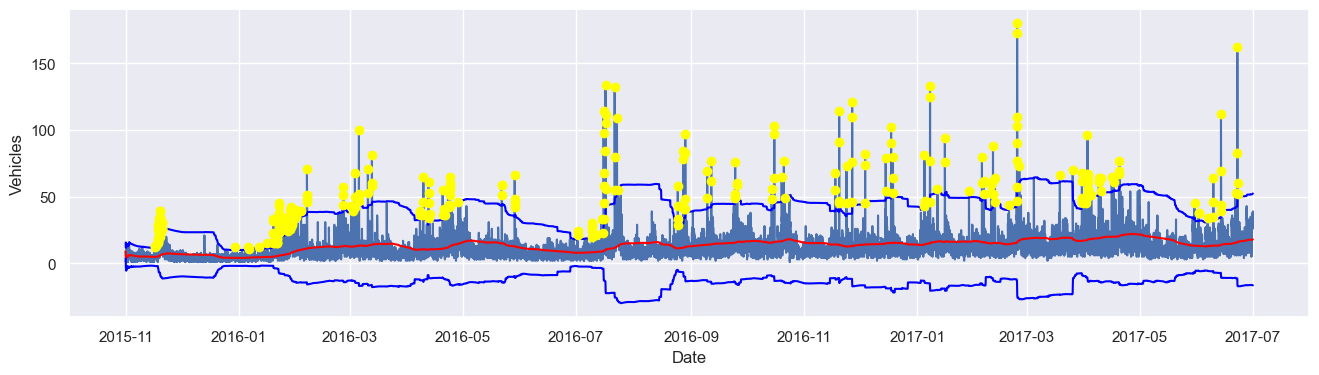

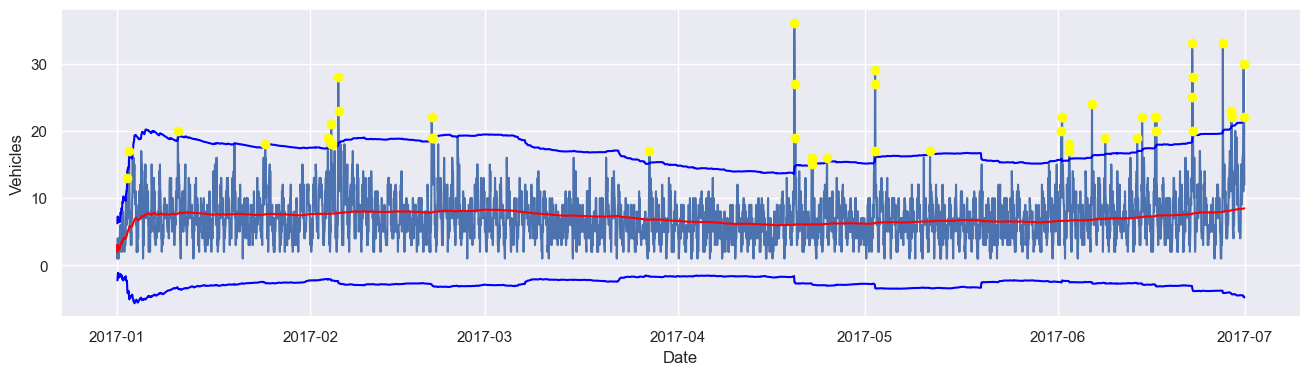

In [86]:
for j in jads:
    j, idx, rmeans, upper, lower = model_mean(j)
    plot_outlier_detection(j, idx, rmeans, upper, lower)

In [87]:
def model_alp_median(j, std_param = 3, window_length = 720, alpha = 0.005):
    
    rmeans = j.rolling(window_length, min_periods=1).median()
    rstd = j.rolling(window_length, min_periods=1).std()
    
    idx1 = (j>(rmeans+std_param*rstd*np.exp(-alpha*rstd)))
    idx2 = (j<(rmeans-std_param*rstd*np.exp(-alpha*rstd)))
    idx = idx1 | idx2
    
    upper = rmeans+std_param*rstd*np.exp(-alpha*rstd)
    lower = rmeans-std_param*rstd*np.exp(-alpha*rstd)
    
    return j, idx, rmeans, upper, lower

This code uses moving averages and standard deviations to detect outliers in a given time series. It defines outliers based on a threshold value (std_param) and a constant (alpha). Outliers are determined as values that exceed the upper or lower bounds.

rstd = j.rolling(window_length, min_periods=1).std(): This line calculates the rolling standard deviation of the time series j. The rolling function is used with a specified window length and minimum periods.

idx1 = (j > (rmeans + std_param * rstd * np.exp(-alpha * rstd))) and idx2 = (j < (rmeans - std_param * rstd * np.exp(-alpha * rstd))): These two lines detect outliers using a specific threshold value. The first line finds values greater than the upper bound, while the second line finds values smaller than the lower bound.

In summary, this code employs moving averages and standard deviations to identify outliers in a time series. Outliers are determined based on a threshold value (std_param) and a constant (alpha), with values exceeding the upper or lower bounds considered outliers.

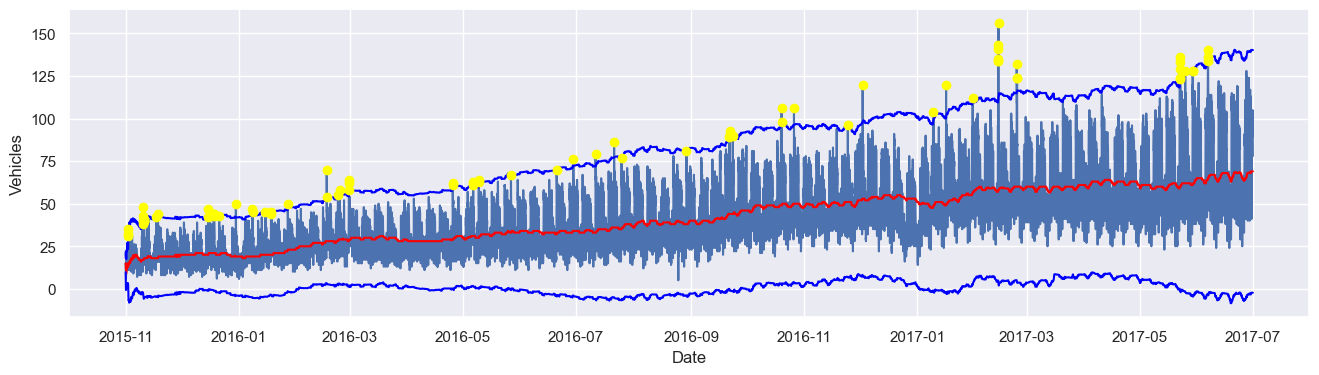

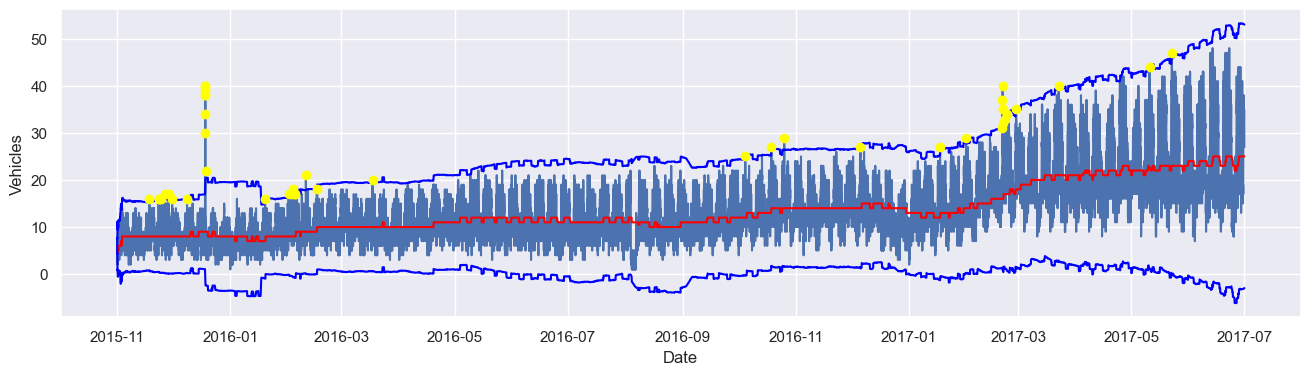

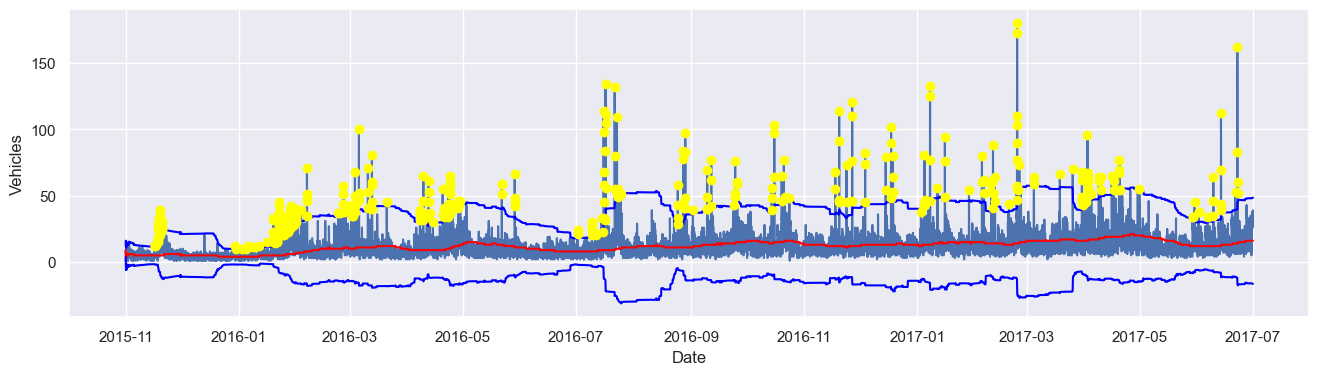

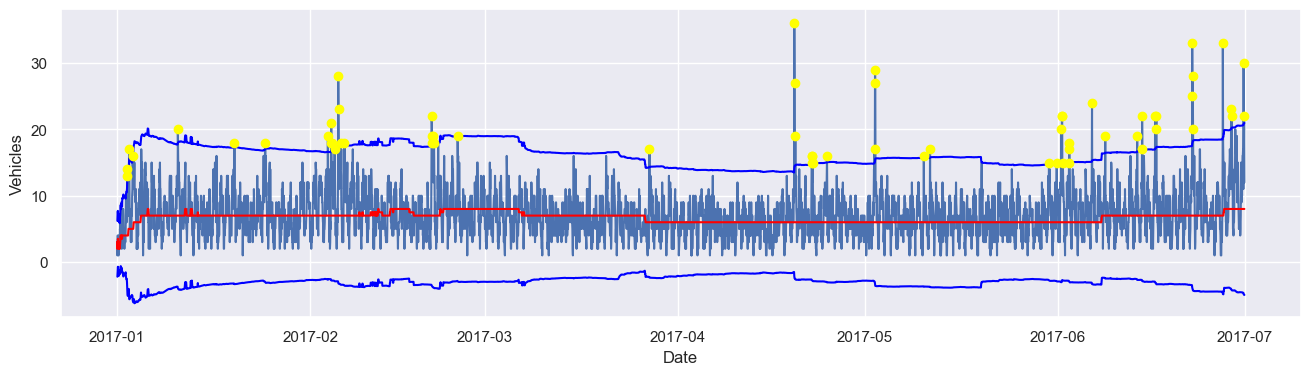

In [88]:
for j in jads:
    j, idx, rmeans, upper, lower = model_alp_median(j)
    plot_outlier_detection(j, idx, rmeans, upper, lower)

In [89]:
def model_mean_kurtosis(junction, std_param = 3, window_length = 720, alpha = 0.015):
    
    rmeans = junction.rolling(window_length, min_periods=1).median()
    rstd = junction.rolling(window_length, min_periods=1).std()
    rstd_lower = junction[junction<rmeans].rolling(window_length ,min_periods=1).std()
    
    kurtosis = j.kurt()

    upper = rmeans+std_param*rstd*np.exp(0.04*kurtosis)
    lower = rmeans - (5*rstd_lower)    
    idx1 = (j>upper)
    idx2 = (j<lower)
    
    idx = idx1 | idx2
    
    return j, idx, rmeans, upper, lower

The code is used to detect outliers in a given hourly time series. The logic and mathematics of the code are as follows:

Firstly, moving averages and standard deviations are calculated for the time series. rmeans represents the median value of the time series within a specific window size (window_length). rstd represents the standard deviation within the same window size. rstd_lower calculates the standard deviation of data points that are lower than the rmeans value.

The kurtosis (flatness) value of the time series is calculated and assigned to the variable 'kurt.' Kurtosis describes the shape of a dataset by focusing on the frequency of peaks and troughs in the data distribution.

Upper and lower bounds are calculated using the moving averages (rmeans). 'upper' represents the upper bound, and 'lower' represents the lower bound. These bounds will be used for detecting outliers.

Outliers are defined as data points that are either greater than the upper bound or less than the lower bound. 'idx1' identifies data points greater than the upper bound, and 'idx2' identifies data points less than the lower bound.

Finally, by combining the results of 'idx1' and 'idx2,' the code creates the 'idx' array that contains all outlier data points.

This code detects outliers in the given hourly time series using moving statistics and kurtosis. Outliers are defined as data points outside specific bounds.

rolling_mean = time_series.rolling(window=5, min_periods=3).mean()
In this example, a moving average window is calculated with 'window' set to 5 data points and 'min_periods' set to 3 data points. This means that there should be a minimum of 3 data points inside the window for calculations. If there are 3 or more data points within the window, the calculation is performed; otherwise, it returns NaN (Not-a-Number) values.

0.19188209363777453
DateTime
2015-11-01 00:00:00    15.0
2015-11-01 01:00:00    14.0
2015-11-01 02:00:00    13.0
2015-11-01 03:00:00    11.5
2015-11-01 04:00:00    10.0
                       ... 
2017-06-30 19:00:00    69.0
2017-06-30 20:00:00    69.0
2017-06-30 21:00:00    69.0
2017-06-30 22:00:00    69.0
2017-06-30 23:00:00    69.0
Name: Vehicles, Length: 14592, dtype: float64
DateTime
2015-11-01 00:00:00          NaN
2015-11-01 01:00:00     1.414214
2015-11-01 02:00:00     2.516611
2015-11-01 03:00:00     3.500000
2015-11-01 04:00:00     3.193744
                         ...    
2017-06-30 19:00:00    27.224794
2017-06-30 20:00:00    27.221102
2017-06-30 21:00:00    27.221924
2017-06-30 22:00:00    27.221358
2017-06-30 23:00:00    27.219546
Name: Vehicles, Length: 14592, dtype: float64


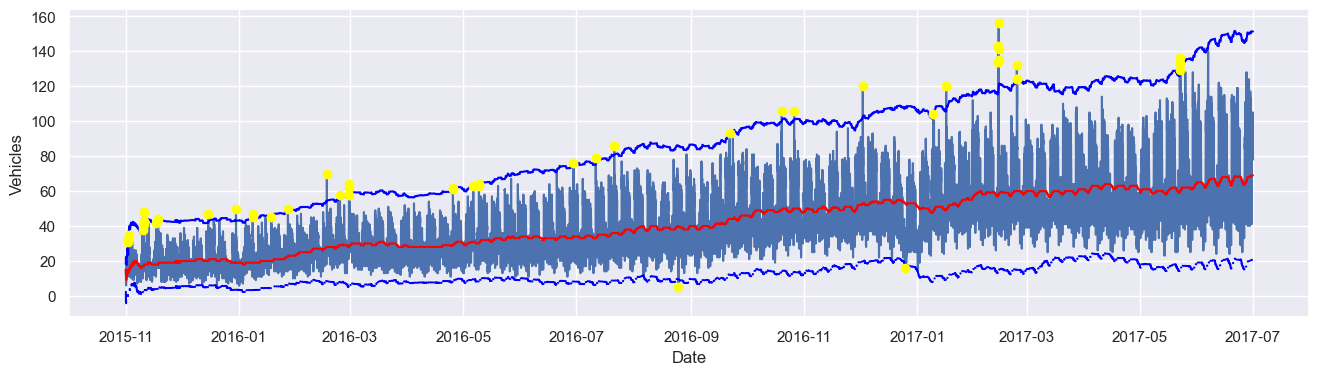

C:\Users\Stajyer\AppData\Local\Temp\ipykernel_9468\3817704049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j[idx] = np.nan


1.783596555414265
DateTime
2015-11-01 00:00:00     6.0
2015-11-01 01:00:00     6.0
2015-11-01 02:00:00     6.0
2015-11-01 03:00:00     6.0
2015-11-01 04:00:00     6.0
                       ... 
2017-06-30 19:00:00    25.0
2017-06-30 20:00:00    25.0
2017-06-30 21:00:00    25.0
2017-06-30 22:00:00    25.0
2017-06-30 23:00:00    25.0
Name: Vehicles, Length: 14592, dtype: float64
DateTime
2015-11-01 00:00:00         NaN
2015-11-01 01:00:00    0.000000
2015-11-01 02:00:00    0.577350
2015-11-01 03:00:00    0.500000
2015-11-01 04:00:00    0.707107
                         ...   
2017-06-30 19:00:00    9.808188
2017-06-30 20:00:00    9.797728
2017-06-30 21:00:00    9.790660
2017-06-30 22:00:00    9.786537
2017-06-30 23:00:00    9.785339
Name: Vehicles, Length: 14592, dtype: float64


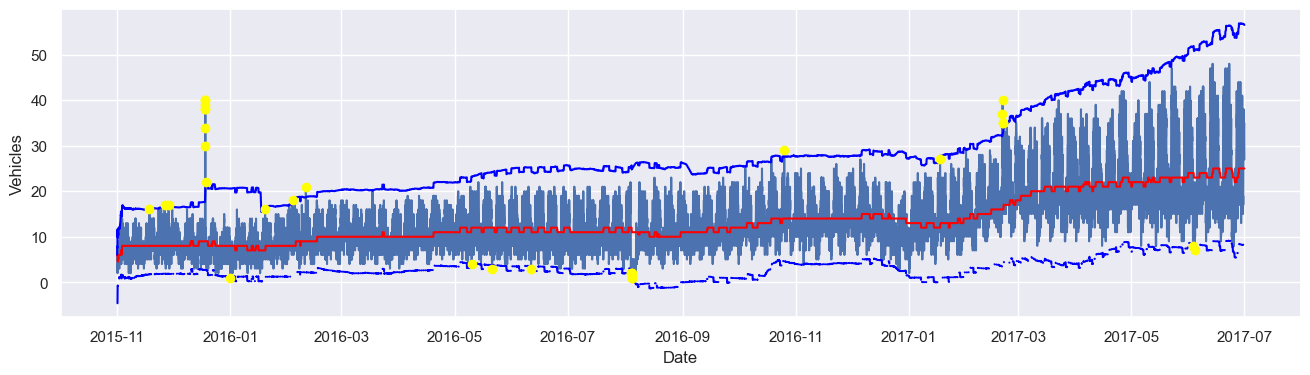

C:\Users\Stajyer\AppData\Local\Temp\ipykernel_9468\3817704049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j[idx] = np.nan


27.36437504960055
DateTime
2015-11-01 00:00:00     9.0
2015-11-01 01:00:00     8.0
2015-11-01 02:00:00     7.0
2015-11-01 03:00:00     6.0
2015-11-01 04:00:00     5.0
                       ... 
2017-06-30 19:00:00    16.0
2017-06-30 20:00:00    16.0
2017-06-30 21:00:00    16.0
2017-06-30 22:00:00    16.0
2017-06-30 23:00:00    16.0
Name: Vehicles, Length: 14592, dtype: float64
DateTime
2015-11-01 00:00:00          NaN
2015-11-01 01:00:00     1.414214
2015-11-01 02:00:00     2.000000
2015-11-01 03:00:00     3.415650
2015-11-01 04:00:00     3.346640
                         ...    
2017-06-30 19:00:00    11.431146
2017-06-30 20:00:00    11.439290
2017-06-30 21:00:00    11.445431
2017-06-30 22:00:00    11.447817
2017-06-30 23:00:00    11.474102
Name: Vehicles, Length: 14592, dtype: float64


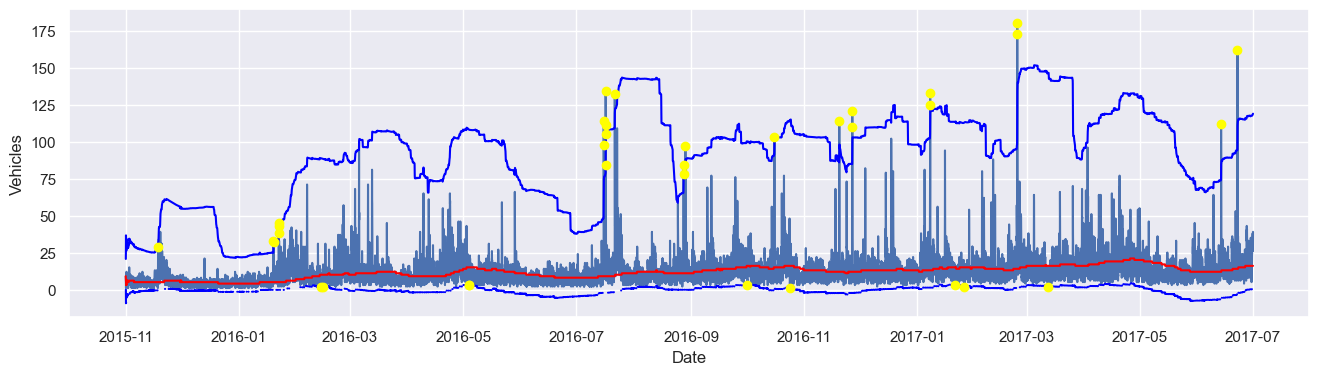

4.737325243604408
DateTime
2017-01-01 00:00:00    3.0
2017-01-01 01:00:00    2.0
2017-01-01 02:00:00    3.0
2017-01-01 03:00:00    3.5
2017-01-01 04:00:00    3.0
                      ... 
2017-06-30 19:00:00    8.0
2017-06-30 20:00:00    8.0
2017-06-30 21:00:00    8.0
2017-06-30 22:00:00    8.0
2017-06-30 23:00:00    8.0
Name: Vehicles, Length: 4344, dtype: float64
DateTime
2017-01-01 00:00:00         NaN
2017-01-01 01:00:00    1.414214
2017-01-01 02:00:00    1.527525
2017-01-01 03:00:00    1.414214
2017-01-01 04:00:00    1.303840
                         ...   
2017-06-30 19:00:00    4.308862
2017-06-30 20:00:00    4.376462
2017-06-30 21:00:00    4.385477
2017-06-30 22:00:00    4.414416
2017-06-30 23:00:00    4.415371
Name: Vehicles, Length: 4344, dtype: float64


C:\Users\Stajyer\AppData\Local\Temp\ipykernel_9468\3817704049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j[idx] = np.nan


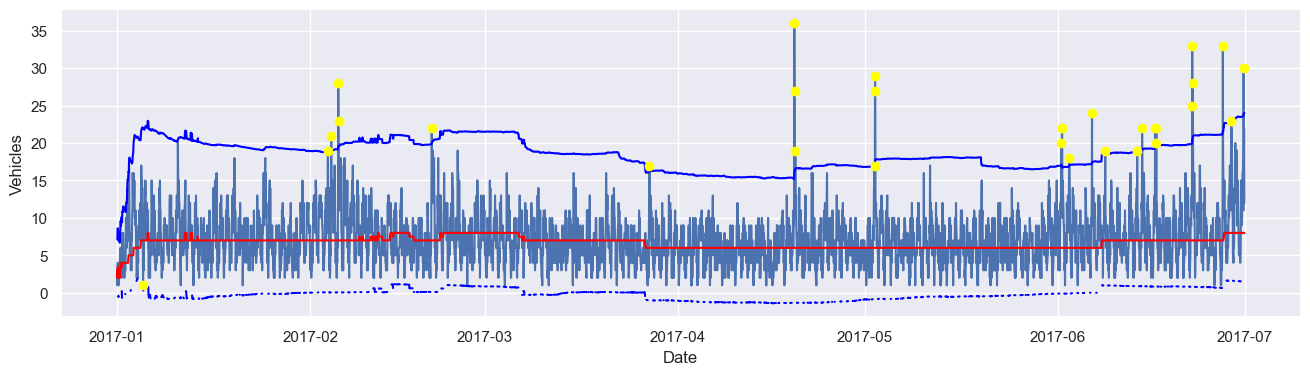

C:\Users\Stajyer\AppData\Local\Temp\ipykernel_9468\3817704049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j[idx] = np.nan


In [90]:
for j in jads:
    j, idx, rmeans, upper, lower = model_mean_kurtosis(j)
    plot_outlier_detection(j, idx, rmeans, upper, lower)
    j[idx] = np.nan

In [91]:
junction_2['Vehicles'].isnull().sum()

32

In [92]:
j1 = junction_1.interpolate(method="ffill")
j2 = junction_2.interpolate(method="ffill")
j3 = junction_3.interpolate(method="ffill")
j4 = junction_4.interpolate(method="ffill")

In [93]:
j2['Vehicles'].isnull().sum()

0